# Examples: Week 3


## Digging into the buildings

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
f = open("data-readonly/IL_Building_Inventory.csv")
reader = csv.reader(f)
header = next(reader)
data = {}
for column in header:
    data[column] = []
for record in reader:
    for name, value in zip(header, record):
        data[name].append(value)

data["Square Footage"] = np.array(data['Square Footage'], dtype="float")
data["Year Constructed"] = np.array(data["Year Constructed"], dtype='int')
data["Year Acquired"] = np.array(data["Year Acquired"], dtype='int')


In [3]:
type(data)

dict

In [4]:
data.keys()

dict_keys(['Agency Name', 'Location Name', 'Address', 'City', 'Zip code', 'County', 'Congress Dist', 'Congressional Full Name', 'Rep Dist', 'Rep Full Name', 'Senate Dist', 'Senator Full Name', 'Bldg Status', 'Year Acquired', 'Year Constructed', 'Square Footage', 'Total Floors', 'Floors Above Grade', 'Floors Below Grade', 'Usage Description', 'Usage Description 2', 'Usage Description 3'])

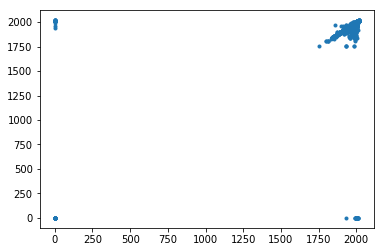

In [5]:
plt.plot( data["Year Acquired"], data["Year Constructed"], '.' )

In [6]:
def my_function(a):
    return a * 2

In [7]:
my_function(10)

20

In [8]:
data["Year Acquired"] > 1900

array([ True,  True,  True, ..., False,  True, False], dtype=bool)

In [9]:
def filter_greater(dataset, column, value):
    good_vals = dataset[column] > value
    filtered_dataset = {}
    for col in dataset:
        filtered_dataset[col] = dataset[col][good_vals]
    return filtered_dataset

In [10]:
dataset = {'Year Acquired': data["Year Acquired"],
          'Year Constructed': data["Year Constructed"],
          'Square Footage': data["Square Footage"]}

In [11]:
filtered = filter_greater(dataset, "Year Acquired", 1800)
filtered = filter_greater(filtered, "Year Constructed", 1800)

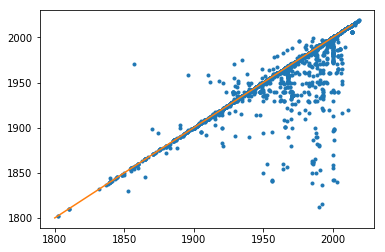

In [12]:
plt.plot( filtered["Year Acquired"], filtered["Year Constructed"], '.' )
plt.plot( np.arange(1800, 2015), np.arange(1800, 2015), '-')

In [13]:
building_age = filtered["Year Acquired"] - filtered["Year Constructed"]

(0, 200)

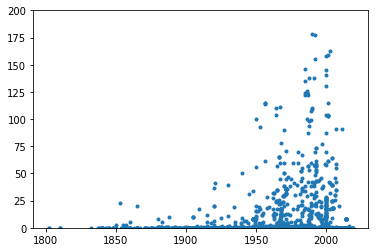

In [14]:
plt.plot(filtered["Year Acquired"], building_age, '.')
plt.ylim(0, 200)

In [15]:
filtered["Building Age"] = building_age

In [16]:
purchased = filter_greater(filtered, "Building Age", 0)

In [17]:
purchased["Building Age"].min()

1

In [18]:
purchased["Building Age"].max()

178

(array([ 555.,  257.,   57.,   36.]),
 array([  0,  10,  50, 100, 180]),
 <a list of 4 Patch objects>)

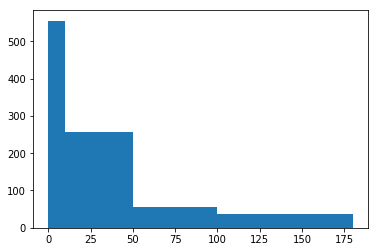

In [19]:
plt.hist(purchased["Building Age"], bins=[0, 10, 50, 100, 180]
        )

(array([ 667.,  106.,   48.,   35.,    6.,   15.,   14.,    6.,    5.,    3.]),
 array([   1. ,   18.7,   36.4,   54.1,   71.8,   89.5,  107.2,  124.9,
         142.6,  160.3,  178. ]),
 <a list of 10 Patch objects>)

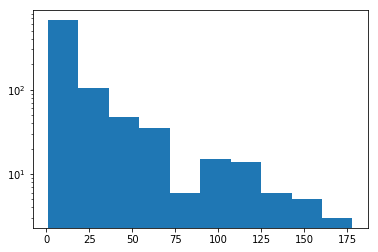

In [20]:
plt.hist(purchased["Building Age"], log=True)

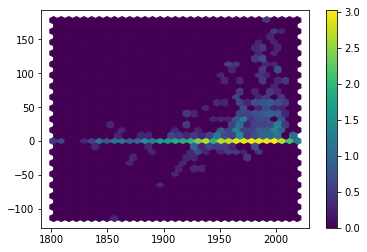

In [21]:
plt.hexbin(filtered["Year Acquired"], building_age, gridsize=32, bins = 'log')
plt.colorbar()

In [22]:
def make_plot(gridsize, cmap, style):
    with plt.style.context(style):
        plt.hexbin(filtered["Year Acquired"], building_age,
                   gridsize=gridsize, bins = 'log',
                   cmap = cmap)
        plt.colorbar()

In [23]:
import ipywidgets

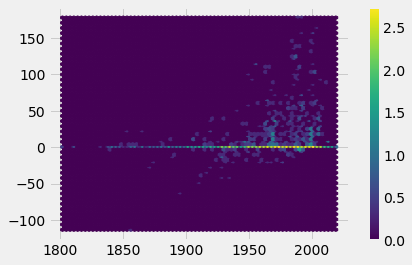

<function __main__.make_plot>

In [24]:
ipywidgets.interact(make_plot, gridsize = (16, 128, 1),
                   cmap = ["viridis", "inferno", "magma", "flag", "jet"],
                   style = ["fivethirtyeight", "default", "ggplot", "seaborn"])

In [25]:
years = [2012, 2013, 2014, 2015, 2016]
complaints = [3750, 3450, 2975, 2750, 2760]

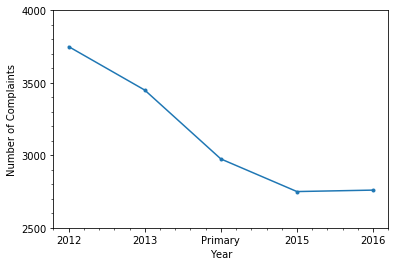

In [26]:
plt.plot(years, complaints, '.-')
plt.xticks( [2012, 2013, 2014, 2015, 2016],
            ['2012', '2013', 'Primary', '2015', '2016'])
plt.yticks( [2500, 3000, 3500, 4000])
plt.minorticks_on()
plt.xlabel("Year")
plt.ylabel("Number of Complaints")